In [77]:
import csv
from past.builtins import raw_input
from pyparsing import col
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas as pd
from io import StringIO


In [78]:
df_train = pd.read_csv("/home/melek/PycharmProjects/hangikredi_machineLearning/term-deposit-marketing-2020.csv", encoding = "iso-8859-1", sep=",")



In [79]:
df_train.shape

(40000, 14)

In [80]:
df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [81]:
df_train['job_id'] = df_train['job'].factorize()[0]
job_id_df = df_train[['job', 'job_id']].drop_duplicates().sort_values('job_id')
job_to_id = dict(job_id_df.values)
id_to_job = dict(job_id_df[['job_id', 'job']].values)
df_train.head(50)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,job_id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,4
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no,2
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no,5
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no,1


In [82]:
df_train.info()

len(df_train)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
 14  job_id     40000 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 4.6+ MB


40000

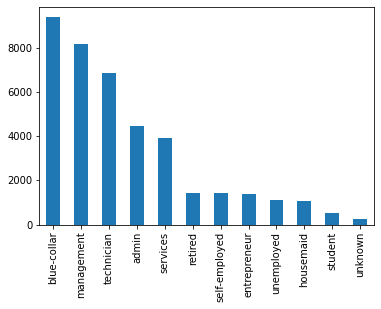

In [83]:
df_train['job'].value_counts().plot(kind='bar')


In [85]:
import matplotlib.pyplot as plt
"""

fig = plt.figure(figsize=(8,6))
df_train.groupby('default').balance.plot.bar(ylim=0)
plt.show()

"""

"\n\nfig = plt.figure(figsize=(8,6))\ndf_train.groupby('default').balance.plot.bar(ylim=0)\nplt.show()\n\n"

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train.job).toarray()
labels = df_train.y
print('y - job',features.shape)

y - job (40000, 16)


In [87]:
import numpy as np
from sklearn.feature_selection import chi2

N = 2
for balance, job_id in sorted(job_to_id.items()):
  features_chi2 = chi2(features, labels == job_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(balance))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))





# 'admin':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'blue-collar':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'entrepreneur':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'housemaid':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'management':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'retired':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'self-employed':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue collar
. self employed
# 'services':
  . Most correlated unigrams:
. unemployed
. unknown
  . Most correlated bigrams:
. blue coll

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB



X_train, X_test, y_train, y_test = train_test_split(df_train['job'], df_train['y'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [89]:

print(clf.predict(count_vect.transform(["entrepreneur"])))

['no']


In [90]:
df_train[df_train['job'] == "entrepreneur"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,job_id
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,2
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no,2
27,52,entrepreneur,married,secondary,no,113,yes,yes,unknown,5,may,127,1,no,2
55,38,entrepreneur,single,tertiary,no,243,no,yes,unknown,5,may,174,1,no,2
94,57,entrepreneur,divorced,secondary,no,-37,no,no,unknown,5,may,173,1,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39797,52,entrepreneur,married,primary,no,1998,no,no,telephone,1,jun,153,1,no,2
39806,45,entrepreneur,married,tertiary,no,98,no,no,cellular,1,jun,761,2,no,2
39902,53,entrepreneur,married,primary,no,55,no,no,cellular,2,jun,217,1,no,2
39931,37,entrepreneur,married,tertiary,no,189,no,no,cellular,2,jun,253,2,yes,2


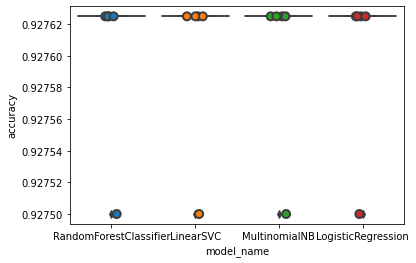

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [92]:
cv_df.groupby('model_name').accuracy.mean()



model_name
LinearSVC                 0.9276
LogisticRegression        0.9276
MultinomialNB             0.9276
RandomForestClassifier    0.9276
Name: accuracy, dtype: float64

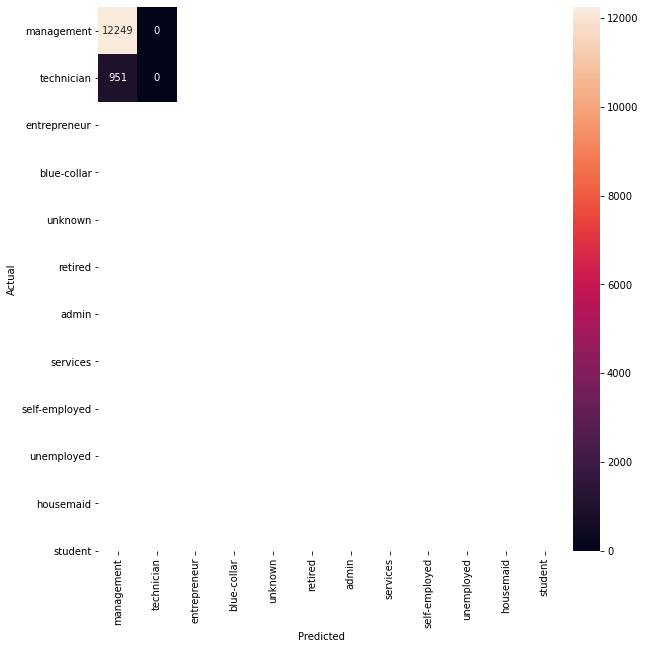

In [93]:
#test verilerini train içerisinden böldük ,0.33 test verisi için ayrılmıştır.
model = LinearSVC()
#df_train = df_train.rename(columns={'oyuncular ': 'oyuncular'})
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_train.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=job_id_df.job.values, yticklabels=job_id_df.job.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [96]:

from sklearn import metrics
metrics.classification_report(y_test, y_pred, target_names=df_train["y"].unique())



/home/melek/PycharmProjects/CassandraFlaskTest/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n          no       0.93      1.00      0.96     12249\n         yes       0.00      0.00      0.00       951\n\n    accuracy                           0.93     13200\n   macro avg       0.46      0.50      0.48     13200\nweighted avg       0.86      0.93      0.89     13200\n'

In [99]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [100]:
y_test

12836     no
10913     no
4214      no
8198      no
31403     no
        ... 
26502    yes
18994     no
24743     no
13119     no
33414    yes
Name: y, Length: 13200, dtype: object